## Cleaning the Dataset

    Import Dependencies

In [145]:
%matplotlib inline

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

    Load Dataset

In [146]:
file = 'Resources/stroke.csv'
stroke_df = pd.read_csv(file)
print(f'{len(stroke_df)} rows')
stroke_df.sample(20) # visually unbalanced

5110 rows


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3191,40503,Male,21.00,0,0,No,Private,Rural,62.91,26.2,never smoked,0
2631,13116,Male,49.00,0,0,Yes,Private,Urban,87.06,28.3,never smoked,0
977,59178,Female,7.00,0,0,No,children,Urban,86.75,22.3,Unknown,0
2116,63219,Male,1.24,0,0,No,children,Urban,109.97,19.3,Unknown,0
4136,23439,Male,63.00,0,1,No,Private,Urban,75.00,25.7,smokes,0
26,38047,Female,65.00,0,0,Yes,Private,Rural,100.98,28.2,formerly smoked,1
4487,50009,Female,17.00,0,0,No,Private,Urban,81.51,19.5,formerly smoked,0
1955,71182,Female,61.00,1,0,Yes,Govt_job,Urban,153.38,38.8,never smoked,0
3394,27125,Female,17.00,0,0,No,Private,Urban,81.13,22.8,never smoked,0
558,29010,Male,5.00,0,0,No,children,Rural,100.52,17.2,Unknown,0


In [147]:
# statistical summary of numerical data
stroke_df.describe().round(2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


    Drop Unnecessary Rows, Columns, and Values

In [148]:
# check data types
stroke_df.dtypes # we will change as we clean

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [149]:
# drop identifier columns
stroke_df.drop('id', axis=1, inplace=True)
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [150]:
# check values
print(stroke_df['gender'].value_counts())
# remove Other from gender
stroke_df = stroke_df.loc[stroke_df.gender != 'Other']
# check
print(stroke_df['gender'].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Female    2994
Male      2115
Name: gender, dtype: int64


In [151]:
# check values
print(stroke_df['age'].value_counts()) # many values with decimals under 1
# round values to nearest whole number, most important for infants and toddlers
stroke_df['age'] = [round(x) for x in stroke_df['age']]

#make all values under 0 = 1 for scaling later on
# stroke_df['age'].replace(0, 1, inplace=True)

# check
print(stroke_df['age'].value_counts())

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
78    102
57     95
2      90
52     90
54     87
     ... 
10     35
4      34
7      32
6      24
0      20
Name: age, Length: 83, dtype: int64


In [152]:
# check values
print(stroke_df['hypertension'].value_counts())

0    4611
1     498
Name: hypertension, dtype: int64


In [153]:
# check values
print(stroke_df['heart_disease'].value_counts())

0    4833
1     276
Name: heart_disease, dtype: int64


In [154]:
# check values
print(stroke_df['ever_married'].value_counts())

Yes    3353
No     1756
Name: ever_married, dtype: int64


In [155]:
# check values
print(stroke_df['work_type'].value_counts())
print(stroke_df['stroke'].loc[(stroke_df.work_type == 'Private') & (stroke_df.stroke == 0)].count())

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
2775


In [156]:
# create different test dataframes for smoking column
remove_private_df = stroke_df.loc[stroke_df.work_type != 'Private']
# df length before
print(stroke_df.stroke.count())
# df length after
print(remove_private_df.stroke.count())

5109
2185


In [157]:
# find whether or not removing the 'Private' category from work_type negatively impacts the dataset's label balance

ratio_after = remove_private_df.loc[remove_private_df.stroke == 1]['stroke'].count()/remove_private_df.loc[remove_private_df.stroke == 0]['stroke'].count()
ratio_before = stroke_df.loc[stroke_df.stroke == 1]['stroke'].count()/stroke_df.loc[stroke_df.stroke == 0]['stroke'].count()

print(f"Stroke ratio (1:0) BEFORE dropping 'Private' category: {ratio_after}")
print(f"Stroke ratio (1:0) AFTER dropping 'Private' category: {ratio_before}")
print(f"Ratio Difference: {(ratio_before/ratio_after-1):.1%} delta in target balance afte removal")
print("\nObservation: 'Private' category makes up more than half of the work_type column.\nDecision: Wait to see importance using KNearest method before removing column entirely.\nReasoning: Work is a major stressor for many, and we want to se how it impacts our model before removing it enitrely.")

Stroke ratio (1:0) BEFORE dropping 'Private' category: 0.047961630695443645
Stroke ratio (1:0) AFTER dropping 'Private' category: 0.05123456790123457
Ratio Difference: 6.8% delta in target balance afte removal

Observation: 'Private' category makes up more than half of the work_type column.
Decision: Wait to see importance using KNearest method before removing column entirely.
Reasoning: Work is a major stressor for many, and we want to se how it impacts our model before removing it enitrely.


In [158]:
# check values
print(stroke_df['Residence_type'].value_counts())

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


In [159]:
# check null values for float columns
print(stroke_df.isnull().sum())
# remove null values
stroke_df.dropna(inplace=True)
# check again
print(stroke_df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [160]:
# check values
print(stroke_df['smoking_status'].value_counts())

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64


In [161]:
# create different test dataframes for smoking column
remove_unknown_df = stroke_df.loc[stroke_df.smoking_status != 'Unknown']
# df length before
# df length after
print(stroke_df.stroke.count())
print(remove_unknown_df.stroke.count())

4908
3425


In [162]:
# find whether or not removing the 'Unknown' category from smoking_status negatively impacts the dataset's stroke category balance

ratio_before = stroke_df.loc[stroke_df.stroke == 1]['stroke'].count()/stroke_df.loc[stroke_df.stroke == 0]['stroke'].count()
ratio_after = remove_unknown_df.loc[remove_unknown_df.stroke == 1]['stroke'].count()/remove_unknown_df.loc[remove_unknown_df.stroke == 0]['stroke'].count()

print(f"Stroke ratio (1:0) BEFORE dropping 'Unknown' category: {ratio_before}")
print(f"Stroke ratio (1:0) AFTER dropping 'Unknown' category: {ratio_after}")
print(f"Ratio Difference: {(ratio_after/ratio_before-1):.1%} delta in target balance after removal")
print("\nObservation: Removing the 'Unknown' category in smoking_status column reduces label balance by 20%.\nDecision: We will leave in the 'Unknown' category of smoking_status until balancing techniques are applied and importance checks are run.\nReasoning: our dataset is tremendously imbalanaced, and we want to hang on to as much 'stroke' labels as possible.")

Stroke ratio (1:0) BEFORE dropping 'Unknown' category: 0.04447754841455629
Stroke ratio (1:0) AFTER dropping 'Unknown' category: 0.05546995377503852
Ratio Difference: 24.7% delta in target balance after removal

Observation: Removing the 'Unknown' category in smoking_status column reduces label balance by 20%.
Decision: We will leave in the 'Unknown' category of smoking_status until balancing techniques are applied and importance checks are run.
Reasoning: our dataset is tremendously imbalanaced, and we want to hang on to as much 'stroke' labels as possible.


In [163]:
# check values
print(stroke_df['stroke'].value_counts())

0    4699
1     209
Name: stroke, dtype: int64


## Preprocessing - this is currently a mess. I think balancing the data must be balanced first to produce readable results. balance, one-hot encode, test ... remove unknown/private categories if necessary

    Import Dependencies

In [164]:
# preprocessing dependencies
from sklearn.preprocessing import OneHotEncoder,normalize
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# plotting dependencies
import matplotlib.pyplot as plt
import numpy as np

In [165]:

# model dependencies
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from collections import Counter

# plotting
import seaborn as sns

    One Hot Encoding

Purpose of OHE is to ensure that catagorical data is not enterpreted as proximity in a single column.
* If there are 4 encoded categories stored in this same column, 1 is closer in value to 2 than it is to 4, and depending on the model this may interpreted in incorrectly without us realizing. For our purpose, work_type (Example) be equally distant / nonsimilar.

In [166]:
# create instance of OHE
ohe = OneHotEncoder()
cat_cols = [(col) for col in stroke_df.columns if stroke_df[col].dtype == 'O']

# create tranformer to OneHotEncode categorical columns and leave non-cat columsn alone / passthrough to final set
column_trans = make_column_transformer(
    (ohe, cat_cols),
    remainder = 'passthrough')

In [167]:
# encode categorical columns
enc_array = column_trans.fit_transform(stroke_df)
stroke_enc = pd.DataFrame(enc_array)

stroke_enc.columns = column_trans.get_feature_names()

#check that no continuous columns contains zeros (only binary columns do currently which is good)
# print((stroke_enc == 0).sum())

# replace 0's with -1's
# stroke_enc.replace(0,-1,inplace=True)

/Users/max/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [168]:
stroke_enc.describe()

,onehotencoder__x0_Female,onehotencoder__x0_Male,onehotencoder__x1_No,onehotencoder__x1_Yes,onehotencoder__x2_Govt_job,onehotencoder__x2_Never_worked,onehotencoder__x2_Private,onehotencoder__x2_Self-employed,onehotencoder__x2_children,onehotencoder__x3_Rural,...,onehotencoder__x4_Unknown,onehotencoder__x4_formerly smoked,onehotencoder__x4_never smoked,onehotencoder__x4_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,...,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,0.590261,0.409739,0.347188,0.652812,0.128362,0.004482,0.572535,0.157905,0.136716,0.492665,...,0.302160,0.170334,0.377343,0.150163,42.868989,0.091891,0.049511,105.297402,28.89456,0.042584
std,0.491836,0.491836,0.476125,0.476125,0.334526,0.066808,0.494761,0.364689,0.343582,0.499997,...,0.459241,0.375964,0.484771,0.357268,22.555878,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


    Scale / Normalize

In [169]:
def normalize(values):
    return (values - values.min())/(values.max() - values.min())

In [170]:
def standardize(values):
    return (values - values.mean())/values.std()

In [171]:
from sklearn.preprocessing import MinMaxScaler
 
mmscaler = MinMaxScaler()
cols = ['age','avg_glucose_level','bmi']
stroke_enc[cols] = stroke_enc[cols].apply(standardize)
stroke_enc[cols] = mmscaler.fit_transform(stroke_enc[cols])

In [172]:
# Create a StandardScaler instances

# Fit the StandardScaler

# X_scaler = scaler.fit(X_train_normalized)

# # Scale the data
# X_train_scaled = X_scaler.transform(X_normalized)
# X_test_scaled = X_scaler.transform(X_test_normalized)

In [173]:
stroke_enc.describe()

,onehotencoder__x0_Female,onehotencoder__x0_Male,onehotencoder__x1_No,onehotencoder__x1_Yes,onehotencoder__x2_Govt_job,onehotencoder__x2_Never_worked,onehotencoder__x2_Private,onehotencoder__x2_Self-employed,onehotencoder__x2_children,onehotencoder__x3_Rural,...,onehotencoder__x4_Unknown,onehotencoder__x4_formerly smoked,onehotencoder__x4_never smoked,onehotencoder__x4_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,...,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000
mean,0.590261,0.409739,0.347188,0.652812,0.128362,0.004482,0.572535,0.157905,0.136716,0.492665,...,0.302160,0.170334,0.377343,0.150163,0.522793,0.091891,0.049511,0.231638,0.212996,0.042584
std,0.491836,0.491836,0.476125,0.476125,0.334526,0.066808,0.494761,0.364689,0.343582,0.499997,...,0.459241,0.375964,0.484771,0.357268,0.275072,0.288901,0.216954,0.205085,0.089969,0.201937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.304878,0.000000,0.000000,0.101318,0.151203,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.536585,0.000000,0.000000,0.168775,0.203895,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.731707,0.000000,0.000000,0.269481,0.261168,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


    Create Test Set

In [174]:
# create train and test split and random_state for consistency
X = stroke_enc.drop('stroke',axis=1)
y = stroke_enc.stroke

In [175]:
# split data into training and testing groups

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42) # automatically stratifies, putting same ratio of 0's to 1's in each set
print(f'Training size = {X_train.shape[0]}')
print(f'Test size = {X_test.shape[0]}')

Training size = 3926
Test size = 982


([<matplotlib.patches.Wedge at 0x7fc3a0540410>,
 [Text(-1.0901712601200462, 0.14671954064905907, '0'),
  Text(1.0901712652713733, -0.1467195023731096, '1')],
 [Text(-0.5946388691563887, 0.08002884035403221, '95.74'),
  Text(0.5946388719662036, -0.08002881947624159, '4.26')])

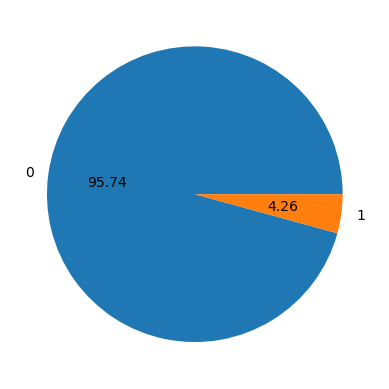

In [176]:
# plot piechart? scatterplot with seaborn?
plt.pie(y.value_counts(),autopct='%.2f', labels=['0', '1'])

In [177]:
# check majority and minority classes in training set
print(sorted(Counter(X_train).items()))

[('age', 1), ('avg_glucose_level', 1), ('bmi', 1), ('heart_disease', 1), ('hypertension', 1), ('onehotencoder__x0_Female', 1), ('onehotencoder__x0_Male', 1), ('onehotencoder__x1_No', 1), ('onehotencoder__x1_Yes', 1), ('onehotencoder__x2_Govt_job', 1), ('onehotencoder__x2_Never_worked', 1), ('onehotencoder__x2_Private', 1), ('onehotencoder__x2_Self-employed', 1), ('onehotencoder__x2_children', 1), ('onehotencoder__x3_Rural', 1), ('onehotencoder__x3_Urban', 1), ('onehotencoder__x4_Unknown', 1), ('onehotencoder__x4_formerly smoked', 1), ('onehotencoder__x4_never smoked', 1), ('onehotencoder__x4_smokes', 1)]


    Test Random Forest Before Resampling (Over/Under/SMOTE)

In [179]:
rf = RandomForestClassifier()
base_model = rf.fit(X_train,y_train)
base_predict = base_model.predict(X_test)

    Base Model - Must Beat Null Accuracy of .9574

In [182]:
# Calculate the Balanced Accuracy Score
y_pred = base_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred) # this looks good but is actually quite bad since guessing 0 for every test would give higher accuracy (null accuracy)

0.498936170212766

In [ ]:
confusion_matrix(y_test,y_pred) # something may be wrong here... will fix later

array([[  0, 940],
       [  0,  42]])

# 1. Find which resampling method returns best accuracy

# 2. Find out whether or not dropping abstaining categories affects accuracy

# 3. Use the best combination and determine which model to use for the final model

Next step is resampling with imblearn

## Determine Resampling Technique with Imblearn

    Import Dependencies

    Split Test, Train

    Importance Check

In [ ]:
# import dependencies
from sklearn.neighbors import KNeighborsClassifier
from IPython import display
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [ ]:
# do initial demo of knearestneighbors method, (train, test, split) to get inital accuracy score
# loop through process of permutating the validation set, running score, and comparing it to original score.
# if score decrease, it means teh feature is important.
# create new df with ONLY important scores, then run model from scratch

In [ ]:
#drop null values
stroke_df.dropna(inplace=True)
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
stroke_df.smoking_status.value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [ ]:
stroke_df['heart_disease'].value_counts()

0    4665
1     243
Name: heart_disease, dtype: int64

In [ ]:
stroke_df.to_csv('Resources/clean_data.csv')

    Preprocessing

# DATABASE:

 - erd -> 1 table

 - database -> sqlite

        - make schema and create query

* Bagging and Boosting
* PCA
* Correlation heatmap: Seaborn



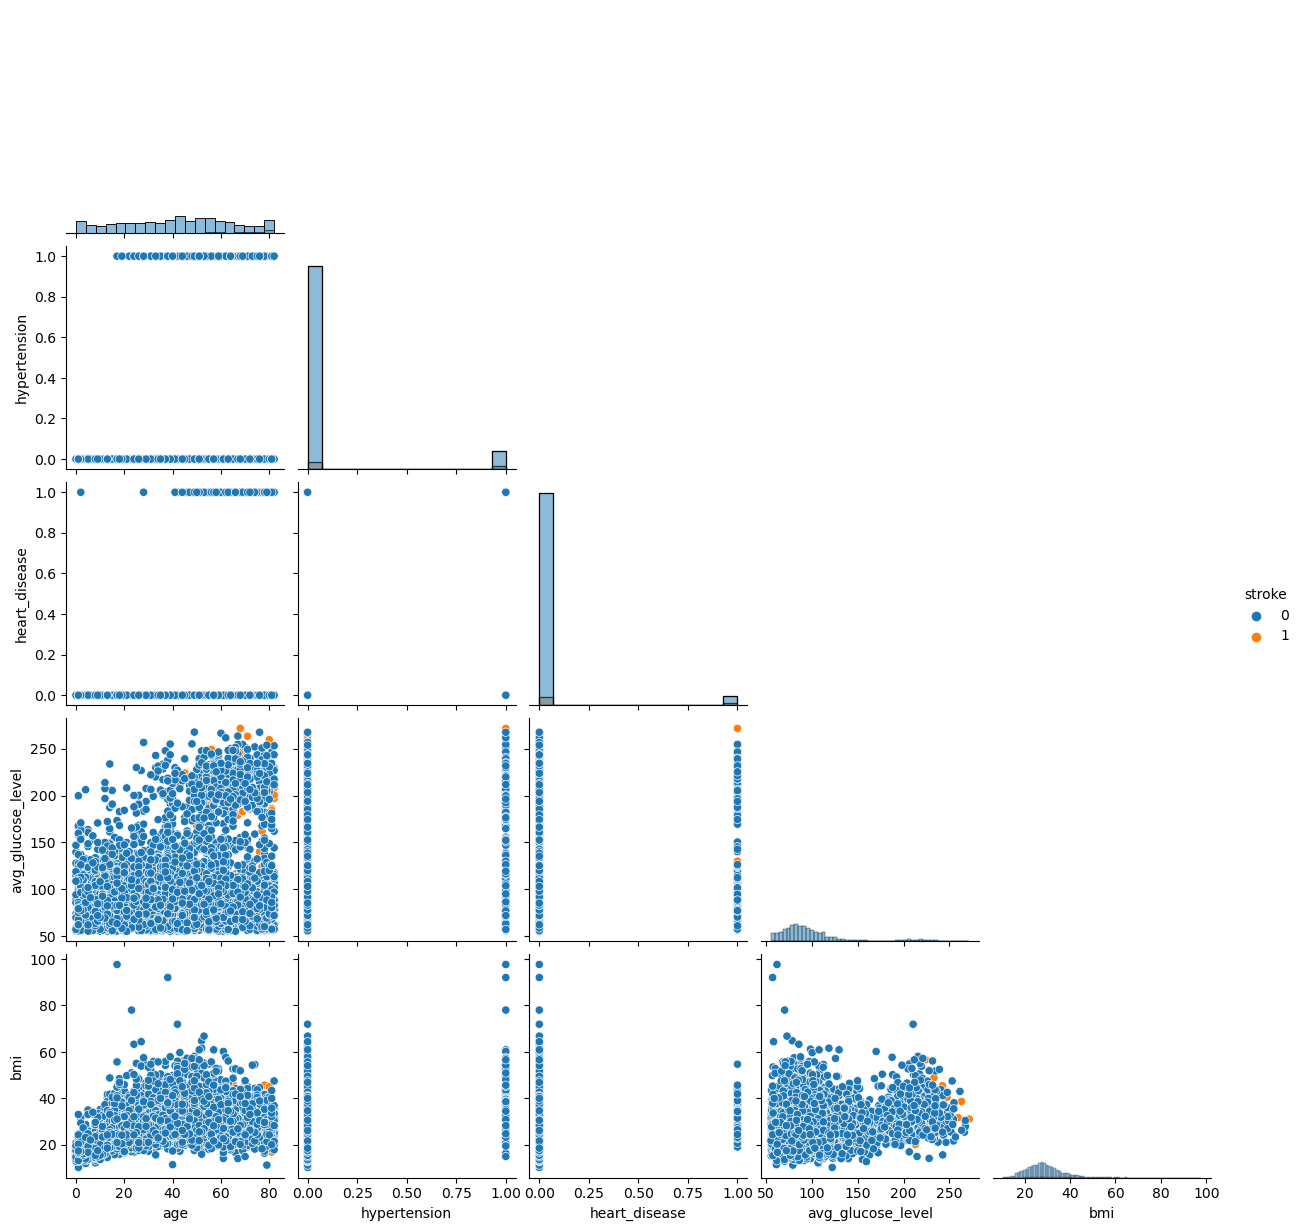

In [ ]:
# correlation check (pairplot)
pairplot = sns.pairplot(stroke_df, hue = "stroke", diag_kind = "hist", corner = True)

    Attributes

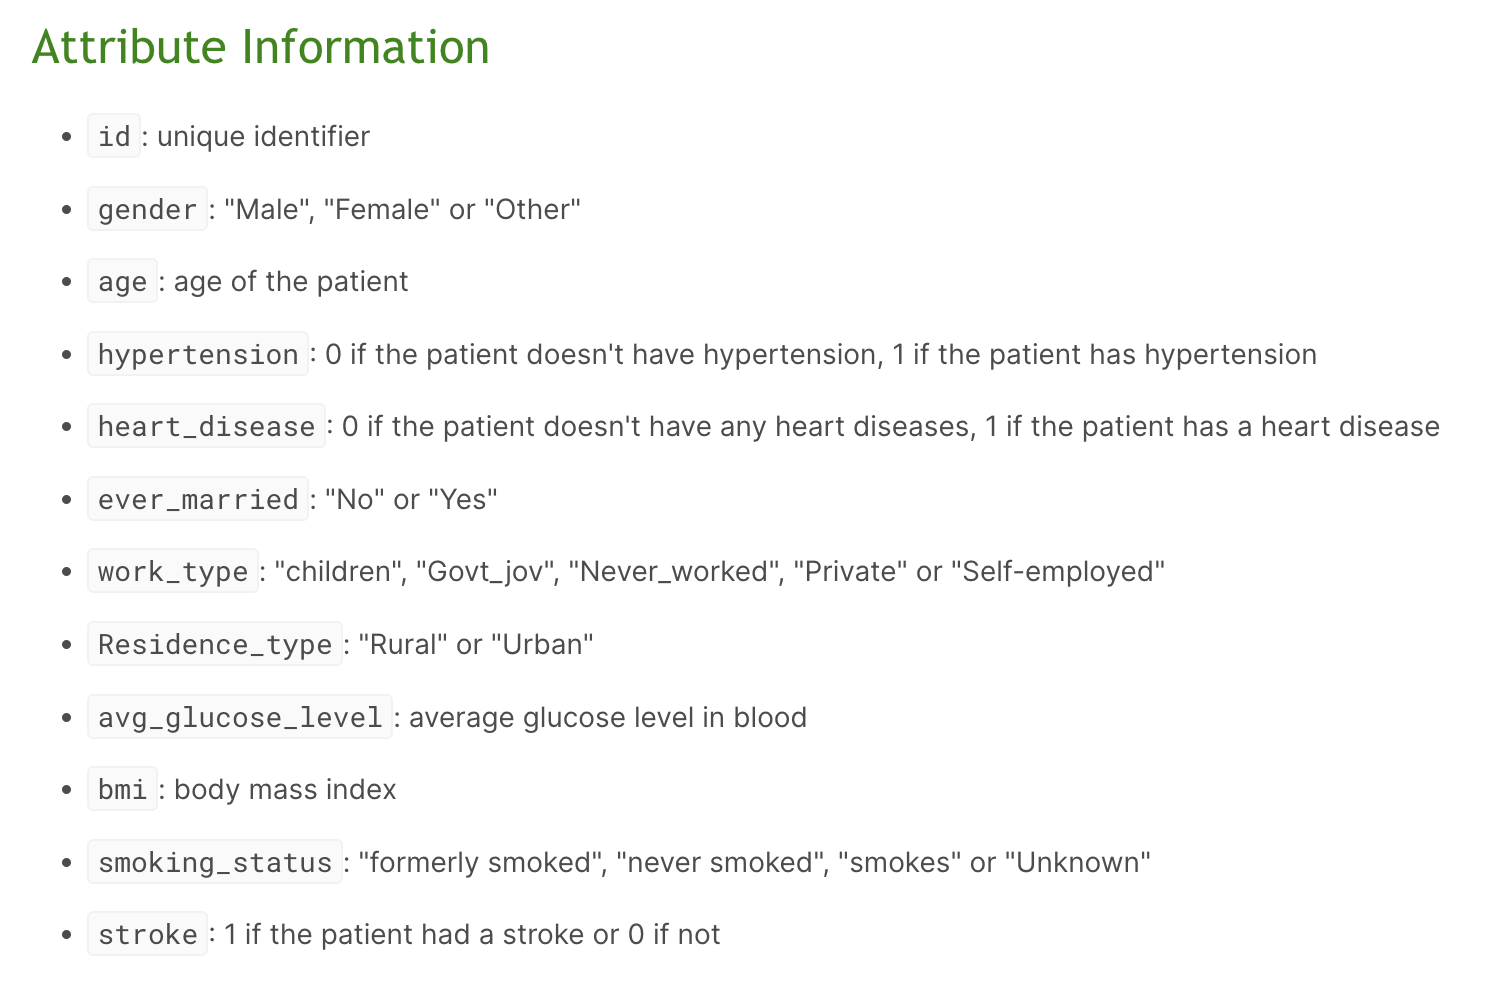

In [ ]:
display.Image('images/attributes.png')